In [1]:
# prompt: 머신러닝 실습을 할건데 기본라이브러리 sklearn 포함해서 선언해줘

import sklearn
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

### 데이터 불러오기

In [2]:
dataPath = "https://raw.githubusercontent.com/hyokwan/python-lecture/refs/heads/master/dataset/cars.csv"
featuresDf = pd.read_csv(dataPath)
featuresDf.head(2)

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792


In [3]:
featuresDf["gender"].value_counts() # 0, 1

,count
gender,
1,494
0,469


In [4]:
featuresDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     963 non-null    int64
 1   gender  963 non-null    int64
 2   miles   963 non-null    int64
 3   debt    963 non-null    int64
 4   income  963 non-null    int64
 5   sales   963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB


### 1. 타입 통합 및 숫자 특성컬럼 추가

In [5]:
# 타입 통합
intColumns =  featuresDf.columns

for col in intColumns :
    featuresDf[col] = featuresDf[col].astype(int)

featuresDf = pd.get_dummies(featuresDf, columns=["gender"], drop_first=True)
featuresDf.head(2)

,age,miles,debt,income,sales,gender_1
0,28,23,0,4099,620,False
1,26,27,0,2677,1792,False


### 2. 특성선정 및 데이터 분리

In [6]:
# 특성 선정
corrDf = featuresDf.corr(numeric_only = True)
stdCorr = 0.5
label = ["sales"]
print( f"정답지는 {label}" )
features = list(corrDf.loc[ ( abs( corrDf.sales ) > stdCorr ) &
                ( abs( corrDf.sales ) != 1) ].index )
print( f"선정된 features: {features}" )
print( corrDf )  # 확인

정답지는 ['sales']
선정된 features: ['miles', 'debt', 'income']
               age     miles      debt    income     sales  gender_1
age       1.000000  0.232399  0.218896  0.239644  0.352609 -0.000702
miles     0.232399  1.000000  0.544791  0.422141  0.636676 -0.031355
debt      0.218896  0.544791  1.000000  0.491790  0.835541 -0.033181
income    0.239644  0.422141  0.491790  1.000000  0.674685 -0.034317
sales     0.352609  0.636676  0.835541  0.674685  1.000000 -0.036350
gender_1 -0.000702 -0.031355 -0.033181 -0.034317 -0.036350  1.000000


In [7]:
# 데이터 분리
from sklearn.model_selection import train_test_split

trainDf, testDf = train_test_split( featuresDf, test_size = 0.2, random_state = 10 )
print( trainDf.shape[0], testDf.shape[0] )

# 데이터를 문제, 정답지로 분리
trainX = trainDf[ features ]
trainY = trainDf[ label ]
testX = testDf[ features ]
testY = testDf[ label ]

print( trainX.shape, trainY.shape, testX.shape, testY.shape )

770 193
(770, 3) (770, 1) (193, 3) (193, 1)


### 3. 모델 적용

In [18]:
## decision tree / randomforest

from sklearn import tree, ensemble

# 1. decision tree

# 모델 선언
dtModel = tree.DecisionTreeRegressor( random_state = 10, max_depth = 5 )
# 모델 훈련
fittedDtModel = dtModel.fit( trainX, trainY )

# 2. random forest

# 모델 선언
rfMode = ensemble.RandomForestRegressor( random_state = 10, max_depth = 5 )
# 모델 훈련
fittedRfModel = rfMode.fit( trainX, trainY )

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### 4. 예측

In [19]:
dtPredValue = fittedDtModel.predict( testX )
rfPredValue = fittedRfModel.predict( testX )
print( len(dtPredValue) , len(rfPredValue) ) # 193

193 193


[Text(0.5504807692307693, 0.9166666666666666, 'x[1] <= 10118.0\nsquared_error = 82470015.788\nsamples = 770\nvalue = 11817.743'),
 Text(0.3076923076923077, 0.75, 'x[2] <= 5067.0\nsquared_error = 28115660.954\nsamples = 555\nvalue = 7036.968'),
 Text(0.4290865384615385, 0.8333333333333333, 'True  '),
 Text(0.15384615384615385, 0.5833333333333334, 'x[1] <= 5.0\nsquared_error = 10134657.32\nsamples = 280\nvalue = 3942.782'),
 Text(0.07692307692307693, 0.4166666666666667, 'x[2] <= 1963.5\nsquared_error = 298072.543\nsamples = 60\nvalue = 1237.583'),
 Text(0.038461538461538464, 0.25, 'x[2] <= 1001.0\nsquared_error = 326414.178\nsamples = 39\nvalue = 1403.231'),
 Text(0.019230769230769232, 0.08333333333333333, 'squared_error = 75789.64\nsamples = 17\nvalue = 1075.647'),
 Text(0.057692307692307696, 0.08333333333333333, 'squared_error = 373080.14\nsamples = 22\nvalue = 1656.364'),
 Text(0.11538461538461539, 0.25, 'x[2] <= 4984.0\nsquared_error = 99842.998\nsamples = 21\nvalue = 929.952'),
 Tex

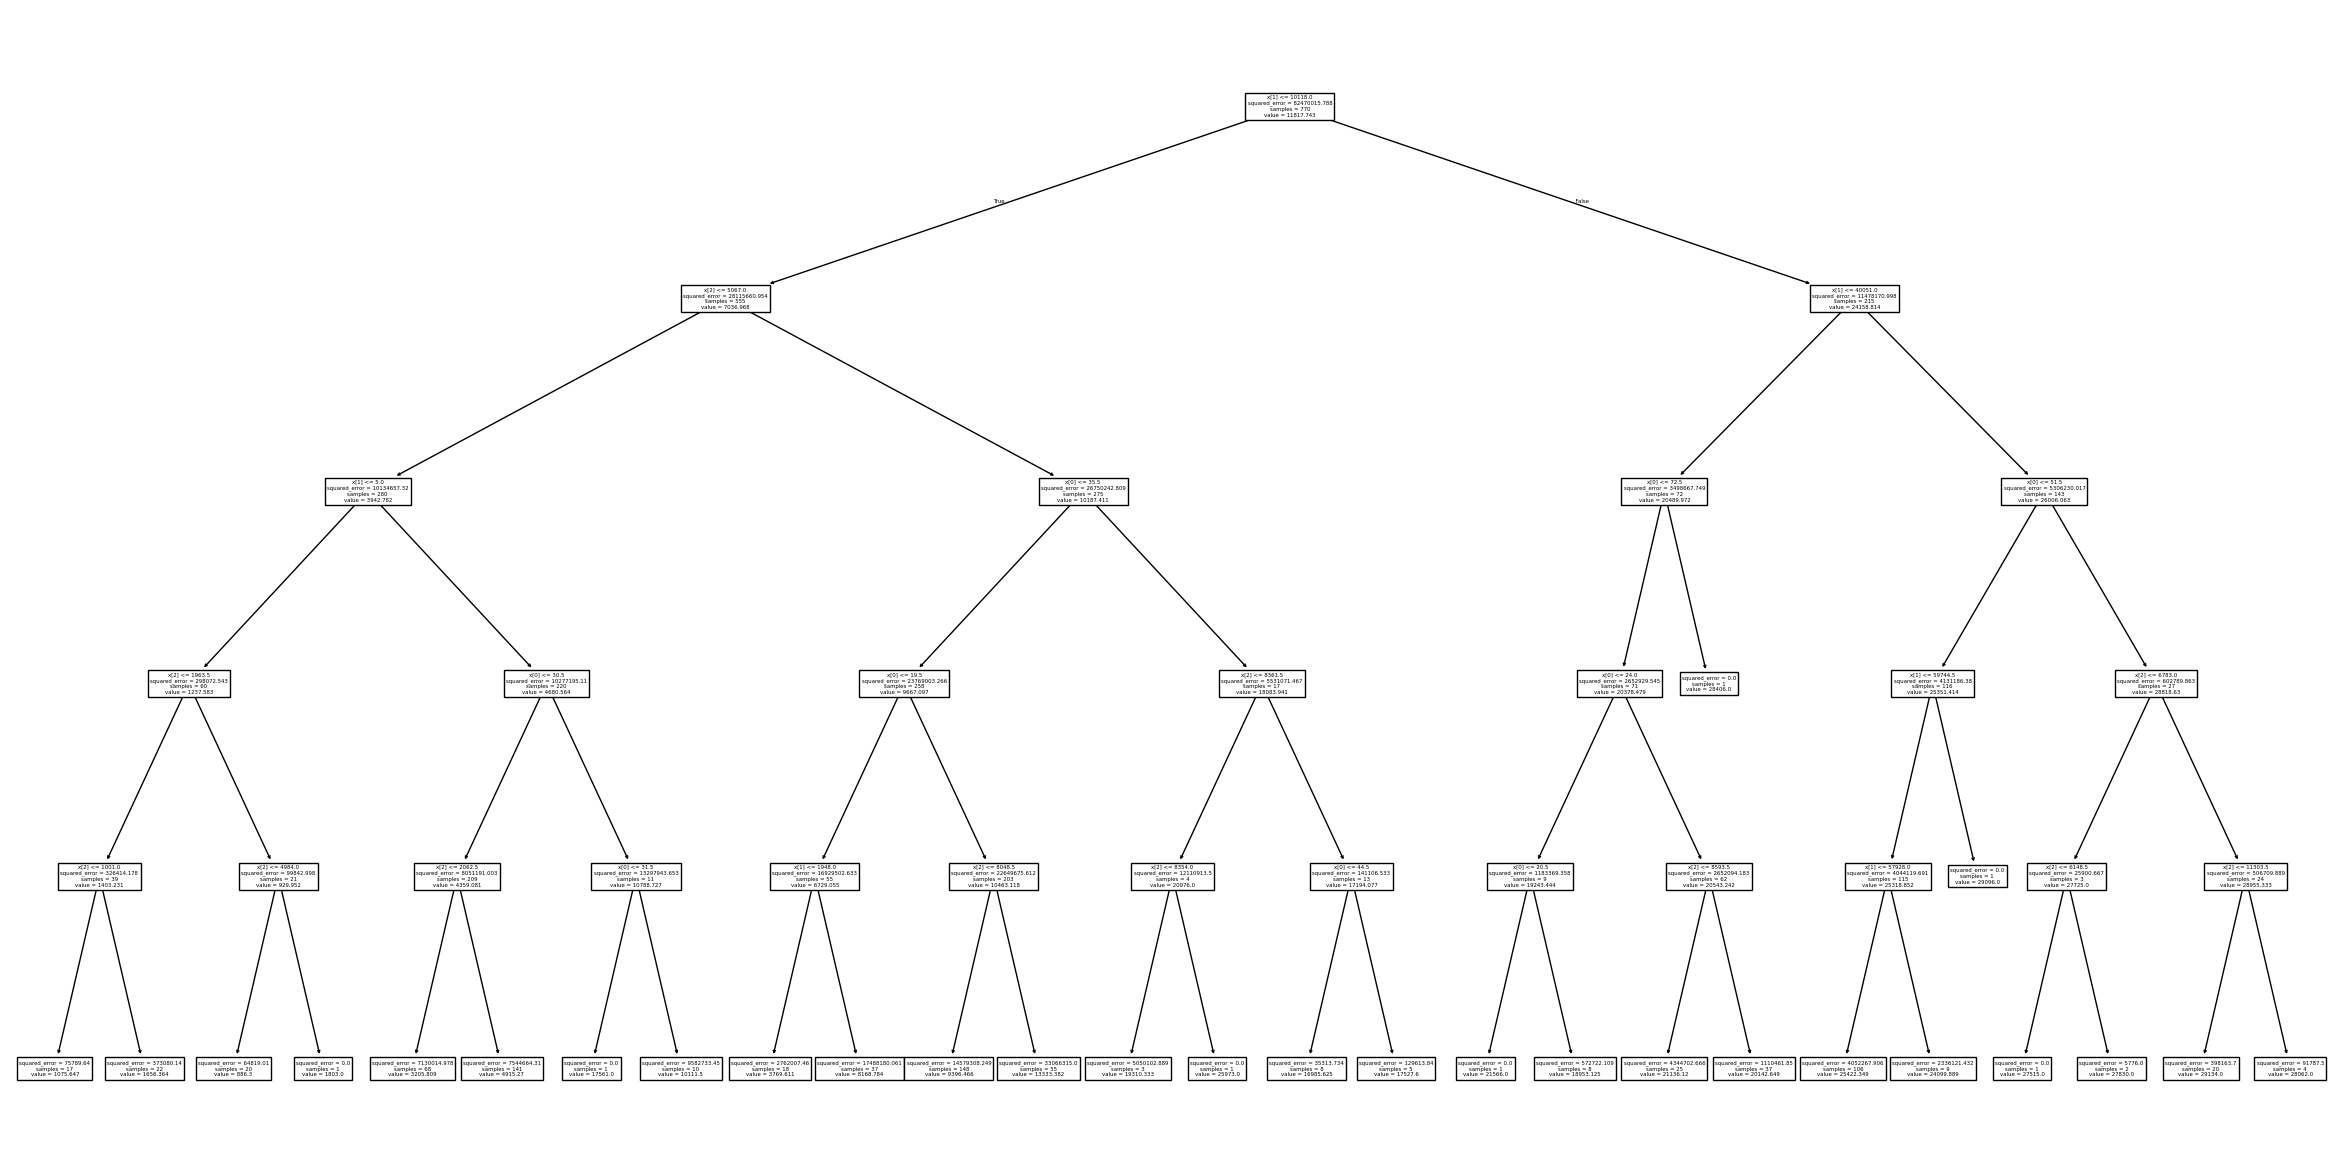

In [25]:
# plot tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure( figsize = (30, 15) )
plot_tree( fittedDtModel )
# plot_tree( fittedRfModel.estimators_[99] )
# plt.savefig( "tree.png" )

In [ ]:
# features: ['miles', 'debt', 'income']
# x[1] : debt : 10118.5 기준 (debt가 낮을 수록 예측값이 낮음)


In [29]:
depth1 = trainDf.loc[ trainDf.debt <= 10118.0 ]
depth1.shape

# from sklearn.model_selection import train_test_split
# trainData, testData = \
#     train_test_split( featuresDf, test_size=0.2, random_state=10)
# trainDataFeatures = trainData.loc[:, features]
# trainDataLabel = trainData.loc[:, label]
# trainDataAll = trainData.loc[:]
# testDataFeatures = testData.loc[:, features]
# testDataLabel = testData.loc[:, label]
# testDataAll = testData.loc[:]
# print( trainDataFeatures.shape )
# print( trainDataLabel.shape )
# print( testDataFeatures.shape )
# print( testDataLabel.shape )
# print( trainDataAll.shape )
# print( testDataAll.shape )

# depth1 = trainDataAll.loc[ trainDataAll.debt <= 10118]
# depth1.shape

(770, 3)
(770, 1)
(193, 3)
(193, 1)
(770, 6)
(193, 6)


(555, 6)

### 5. 데이터 정리

In [11]:
testY["PRED_sales_DT"] = dtPredValue
testY["PRED_sales_RF"] = rfPredValue
testY

<ipython-input-11-876990c2d7f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testY["PRED_sales_DT"] = dtPredValue
<ipython-input-11-876990c2d7f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testY["PRED_sales_RF"] = rfPredValue


,sales,PRED_sales_DT,PRED_sales_RF
456,19247,21708.0,20742.33
615,12886,1955.0,4462.02
753,4894,14884.0,6440.73
943,28119,23197.0,25007.05
27,5222,5332.0,5107.25
...,...,...,...
564,9508,14363.0,8935.84
387,3834,1760.0,2056.31
190,16160,6089.0,7743.83
547,25157,28867.0,25572.82


In [12]:
# 정확도 검증
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## mae
maeDt = mean_absolute_error( testY.sales, dtPredValue )
maeRf = mean_absolute_error( testY.sales,rfPredValue )
print( f"maeDt: {maeDt}, maeRf: {maeRf}" )

## rmse
rmseDt = np.sqrt( mean_squared_error( y_true = testY.sales, y_pred = dtPredValue ) )
rmseRf = np.sqrt( mean_squared_error( y_true = testY.sales, y_pred = rfPredValue ) )
print( f"rmseDt: {rmseDt}, rmseRf: {rmseRf}" )


maeDt: 3313.4715025906735, maeRf: 2647.3222193436955
rmseDt: 4968.241546279343, rmseRf: 3928.273431219658
